In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import geoviews as gv

# Parámetros de mapas
gv.extension("matplotlib")
# Coloca la barra de color horizontal y abajo
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.8*b, w, 0.07*h])
options = { "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar": True,  "colorbar_opts": {"orientation": "horizontal"} } 
options_r = { "colorbar": True, "linewidth": 0.4, "hooks": [hook],
    "colorbar_opts": {"orientation": "horizontal"},
    "cmap": "plasma_r", "ylim":(-62,85), "xlim":(-180,180) }
options_m = { "bgcolor": "#ffffcc", "fontscale": 2,
    "aspect": 2.25, "ylim":(-62,85), "xlim":(-180,180) }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapas
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Contorno de países
countries = gv.Path( borders[["geometry"]]
    ).opts( linewidth = 0.4, color = "k" )

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# World Heritage List
id = "WHC"
# Cargamos el archivo
df = pd.read_excel( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "id_no"
    ).sort_index()
# Creamos un punto con las coordenadas.
df["point"] = gpd.points_from_xy(df["longitude"], df["latitude"])
# Creamos un GeoDataFrame.
df = gpd.GeoDataFrame(df, geometry = "point", crs = 4326)
df["geometry"] = df.buffer(1)
df = df.set_geometry("geometry")

/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_20947/766538732.py:39: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df["geometry"] = df.buffer(1)


In [ ]:
df[["name_en", "states_name_en", "elevation", "latitude", "longitude"]].sort_values("elevation")

,name_en,states_name_en,elevation,latitude,longitude
id_no,,,,,
1446,Baptism Site “Bethany Beyond the Jordan” (Al-M...,Jordan,-381,31.837222,35.552778
1687,Ancient Jericho/Tell es-Sultan,State of Palestine,-211,31.871306,35.444056
8,Ichkeul National Park,Tunisia,-6,37.163610,9.674720
899,Droogmakerij de Beemster (Beemster Polder),Netherlands (Kingdom of the),-3,52.548889,4.911111
759,Dutch Water Defence Lines,Netherlands (Kingdom of the),-3,52.555000,4.791389
...,...,...,...,...,...
1557,Aasivissuit – Nipisat. Inuit Hunting Ground be...,Denmark,None,67.063931,-51.433206
1564,Tr’ondëk-Klondike,Canada,None,64.050347,-139.439947
1567,Funerary and memory sites of the First World W...,"Belgium,France",None,NaN,NaN


In [41]:
# the url of the file we wish to retrieve
site = ( "https://data.lpdaac.earthdatacloud.nasa.gov/"
    + "lp-prod-protected/ASTGTM.003/" )

for row in df[df["longitude"].notnull()
    & df["elevation"].isnull() ].itertuples():
    print(row.Index)

    if row.latitude  > 0: lt = "N"
    else                : lt = "S"
    if row.longitude > 0: ln = "E"
    else                : ln = "W"

    # coordinates
    nlat = f"{lt}{np.abs(np.floor(row.latitude)).astype(int):02}"
    nlon = f"{ln}{np.abs(np.floor(row.longitude)).astype(int):03}"
    # the url of the file we wish to retrieve
    filename = f"ASTGTMV003_{nlat}{nlon}_dem.tif"

    if not os.path.exists(f"../temp/ASTGTMV003/{filename}"):
        print(filename)
        url = f"{site}{filename}"
        # create session with the user credentials that will 
        # be used to authenticate access to the data
        session = SessionWithHeaderRedirection(username, password)
        # save the file
        with open(f"../temp/ASTGTMV003/{filename}", 'wb') as f:
            f.write( session.get(url).content )
    
    if os.stat(f"../temp/ASTGTMV003/{filename}").st_size > 2000:

        df.loc[row.Index, "elevation"] = xr.open_dataarray(
            f"../temp/ASTGTMV003/{filename}", engine = "rasterio" ).sel(
            x = row.longitude, y = row.latitude, method = "nearest").values[0]

154
155
ASTGTMV003_N07W009_dem.tif
156
ASTGTMV003_S03E034_dem.tif
157
ASTGTMV003_N52W132_dem.tif
158
ASTGTMV003_N49W114_dem.tif
159
ASTGTMV003_N07W078_dem.tif
160
162
ASTGTMV003_N49E002_dem.tif
163
ASTGTMV003_N44E004_dem.tif
164
ASTGTMV003_N43E004_dem.tif
165
ASTGTMV003_N47E004_dem.tif
166
ASTGTMV003_S34E151_dem.tif
167
ASTGTMV003_S34E143_dem.tif
168
ASTGTMV003_N49E008_dem.tif
169
ASTGTMV003_N49E009_dem.tif
170
ASTGTMV003_N34W005_dem.tif
171
ASTGTMV003_N31E074_dem.tif
173
ASTGTMV003_S07E039_dem.tif
174
ASTGTMV003_N43E011_dem.tif
175
179
ASTGTMV003_N25E009_dem.tif
180
ASTGTMV003_N19W073_dem.tif
181
ASTGTMV003_S44E146_dem.tif
183
ASTGTMV003_N32E014_dem.tif
184
ASTGTMV003_N32E012_dem.tif
185
ASTGTMV003_S10E046_dem.tif
186
ASTGTMV003_S32E159_dem.tif
187
ASTGTMV003_N52E009_dem.tif
188
ASTGTMV003_N32E003_dem.tif
189
ASTGTMV003_S09W035_dem.tif
190
ASTGTMV003_N32E021_dem.tif
191
ASTGTMV003_N36E005_dem.tif
192
ASTGTMV003_N15E048_dem.tif
193
ASTGTMV003_N36E002_dem.tif
194
ASTGTMV003_N35E006_dem.

In [46]:
df[["name_en", "states_name_en", "elevation"]].to_csv("../results/whc_elevation.csv")

In [55]:
df.loc[df.elevation.isnull(), ["name_en", "states_name_en", "elevation"]]

,name_en,states_name_en,elevation
id_no,,,
154,Great Barrier Reef,Australia,None
588,Danube Delta,Romania,None
653,Tubbataha Reefs Natural Park,Philippines,None
820,Cocos Island National Park,Costa Rica,None
1325,Phoenix Islands Protected Area,Kiribati,None
1326,Papahānaumokuākea,United States of America,None
1567,Funerary and memory sites of the First World W...,"Belgium,France",None


In [54]:
df.loc[df.elevation<7, ["name_en", "states_name_en", "elevation"]].sort_values("elevation")

,name_en,states_name_en,elevation
id_no,,,
1446,Baptism Site “Bethany Beyond the Jordan” (Al-M...,Jordan,-384.0
1687,Ancient Jericho/Tell es-Sultan,State of Palestine,-215.0
775,Hiroshima Peace Memorial (Genbaku Dome),Japan,0.0
1625,Cordouan Lighthouse,France,0.0
898,High Coast / Kvarken Archipelago,"Finland,Sweden",0.0
971,Churches of Chiloé,Chile,0.0
983,Historic Town of St George and Related Fortifi...,United Kingdom of Great Britain and Northern I...,0.0
1007,Cape Floral Region Protected Areas,South Africa,0.0
1067,Historic Centres of Stralsund and Wismar,Germany,0.0


In [56]:
df[df["states_name_en"] == "Algeria"]

,unique_number,rev_bis,name_en,name_fr,name_es,name_ru,name_ar,name_zh,short_description_en,short_description_fr,...,states_name_ar,states_name_zh,region_en,region_fr,iso_code,udnp_code,transboundary,point,geometry,elevation
id_no,,,,,,,,,,,,,,,,,,,,,
102,111,NaN,Al Qal'a of Beni Hammad,La Kalâa des Béni Hammad,alâa de los Béni-Hammad,Крепость Аль-Кала в древнем городе Бени-Хаммад,قلعة بني حمّاد,贝尼•哈玛德的卡拉城,<p>In a mountainous site of extraordinary beau...,<p>Dans un site montagneux d&rsquo;une saisiss...,...,الجزائر,阿尔及利亚,Arab States,États arabes,dz,dza,0,POINT (4.78684 35.81844),"POLYGON ((5.78684 35.81844, 5.78202 35.72042, ...",958.0
179,198,NaN,Tassili n'Ajjer,Tassili n'Ajjer,Tasili n’Ajer,Плато Тассилин-Аджер,طاسيلي ناجّر,阿杰尔的塔西利,<p>Located in a strange lunar landscape of gre...,<p>Cet étrange paysage lunaire de grand intérê...,...,الجزائر,阿尔及利亚,Arab States,États arabes,dz,dza,0,POINT (9.00000 25.50000),"POLYGON ((10.00000 25.50000, 9.99518 25.40198,...",1128.0
188,209,NaN,M'Zab Valley,Vallée du M'Zab,Valle del M’Zab,Долина Мзаб,وادي مزاب,姆扎卜山谷,"<p>A traditional human habitat, created in the...","<p>Le paysage de la vallée du M’Zab, créé au X...",...,الجزائر,阿尔及利亚,Arab States,États arabes,dz,dza,0,POINT (3.68333 32.48333),"POLYGON ((4.68333 32.48333, 4.67851 32.38531, ...",492.0
191,212,NaN,Djémila,Djémila,Yemila,Древний город Джемила,جميلة,杰米拉,"<p>Situated 900 m above sea-level, Dj&eacute;m...","<p>Dj&eacute;mila, ou Cuicul, avec son forum, ...",...,الجزائر,阿尔及利亚,Arab States,États arabes,dz,dza,0,POINT (5.73667 36.32056),"POLYGON ((6.73667 36.32056, 6.73185 36.22254, ...",883.0
193,214,NaN,Tipasa,Tipasa,Tipasa,Древний город Типаса,تيبازا,提帕萨,"<p>On the shores of the Mediterranean, Tipasa ...","<p>Sur les rives de la Méditerranée, Tipasa, a...",...,الجزائر,阿尔及利亚,Arab States,États arabes,dz,dza,0,POINT (2.38333 36.55000),"POLYGON ((3.38333 36.55000, 3.37852 36.45198, ...",98.0
194,215,NaN,Timgad,Timgad,Timgad,Древний город Тимгад,تيمجاد,提姆加德,<p>Timgad lies on the northern slopes of the A...,"<p>Sur le versant nord des Aurès, Timgad fut c...",...,الجزائر,阿尔及利亚,Arab States,États arabes,dz,dza,0,POINT (6.46886 35.48417),"POLYGON ((7.46886 35.48417, 7.46405 35.38615, ...",1070.0
565,667,NaN,Kasbah of Algiers,Casbah d'Alger,Kasba de Argel,Касба (старая часть) города Алжир,قصبة الجزائر,阿尔及尔城堡,"<p>The Kasbah is a unique kind of medina, or I...",<p>Dans l’un des plus beaux sites maritimes de...,...,الجزائر,阿尔及利亚,Arab States,États arabes,dz,dza,0,POINT (3.06028 36.78333),"POLYGON ((4.06028 36.78333, 4.05546 36.68531, ...",55.0


In [24]:
import requests

# overriding requests.Session.rebuild_auth to mantain headers when redirected
class SessionWithHeaderRedirection(requests.Session): 
    AUTH_HOST = 'urs.earthdata.nasa.gov'
    def __init__(self, username, password):
        super().__init__()
        self.auth = (username, password)

   # Overrides from the library to keep headers when redirected to or from 
   # the NASA auth host.
    def rebuild_auth(self, prepared_request, response):
        headers = prepared_request.headers
        url = prepared_request.url

        if 'Authorization' in headers:
            original_parsed = requests.utils.urlparse(response.request.url)
            redirect_parsed = requests.utils.urlparse(url)
            if ( (original_parsed.hostname != redirect_parsed.hostname)
                and redirect_parsed.hostname != self.AUTH_HOST
                and original_parsed.hostname != self.AUTH_HOST ):
                        del headers['Authorization']
                        
        return
 
# Credenciales
password = "yEixa3Zrrv8nXqt-j"
username = "rodrigoms"

In [4]:
c_path = "../share/Climate/"
c_files = os.listdir(c_path)

categories = [ "Drought", "Extreme_temperature",
    "Extreme_rainfall", "Hurricane" ]
cat_var   = []
cat_col_h = []
cat_col_f = []

for cat in categories:
    ds_h = xr.open_dataset(c_path + f"{cat}_1995_2014.nc")
    ds_f = xr.open_dataset(c_path + f"{cat}_2040_2059_SSP245.nc")
    vars = list(ds_h.variables)
    vars.remove("lat")
    vars.remove("lon")
    cat_var.append(vars)

    cols_h = ( [ f"{vars[0]}, 1995-2014, historical" ]
        + [ f"{cat.replace("_", " ")} {x}, 1995-2014, historical"
        for x in vars[1:] ] )
    cols_f = ( [ f"{vars[0]}, 2040-2059, SSP2-4.5" ]
        + [ f"{cat.replace("_", " ")} {x}, 2040-2059, SSP2-4.5"
        for x in vars[1:] ] )
    df[cols_h] = None
    df[cols_f] = None
    cat_col_h.append(cols_h)
    cat_col_f.append(cols_f)

    for row in df.itertuples():
        vals_h = ds_h.sel( lat = row.latitude,
            lon = row.longitude, method = "nearest" )
        vals_f = ds_f.sel( lat = row.latitude,
            lon = row.longitude, method = "nearest" )
        for i in range(0, len(cols_h)):
            if i == 1:
                df.loc[row.Index, cols_h[i]] = bool(vals_h[vars[i]].values + 0)
                df.loc[row.Index, cols_f[i]] = bool(vals_f[vars[i]].values + 0)
            else:
                df.loc[row.Index, cols_h[i]] = vals_h[vars[i]].values + 0
                df.loc[row.Index, cols_f[i]] = vals_f[vars[i]].values + 0

In [5]:
name = "culturales"
v = "Cultural"

columns = [ "name_en", "states_name_en", "category", "danger", "geometry" ]
cultural = df.loc[ df["category"].isin([v]) &
        ( ( df[cat_col_f[0][1]] & ~df[cat_col_h[0][1]] )
        | ( df[cat_col_f[1][1]] & ~df[cat_col_h[1][1]] )
        | ( df[cat_col_f[2][1]] & ~df[cat_col_h[2][1]] )
        | ( df[cat_col_f[3][1]] & ~df[cat_col_h[3][1]] ) ),
        columns + [ cat_col_f[0][0], cat_col_f[1][0],
        cat_col_f[2][0], cat_col_f[3][0] ]
        + [ cat_col_f[0][1], cat_col_f[1][1],
        cat_col_f[2][1], cat_col_f[3][1] ] ]
cultural["Count"] = cultural.iloc[:, -4:].sum(axis = 1)

print(f"Zonas {name} en riesgo climático: {cultural.shape[0]}")
n = df.loc[ df["category"].isin([v]) ].shape[0]
print(f"Total de zonas {name}: {n}")
n2 = 100 * cultural.shape[0] / n
print(f"% de zonas {name} en riesgo climático: {n2:.1f}%")
n3 = df.loc[ df["category"].isin([v]) & df["danger"].isin([1]) ].shape[0]
print(f"Zonas {name} amenazadas: {n3}")
if n3 > 0:
    n4 = cultural[ cultural["danger"].isin([1]) ].shape[0]
    print(f"Zonas {name} amenazadas y en riesgo climático: {n4}")
    n5 = 100 * n4 / n3
    print(f"% de zonas {name} amenazadas en riesgo climático: {n5:.1f}%")

cultural.sort_values( ["danger", "Count"], ascending = False).head(19)

Zonas culturales en riesgo climático: 160
Total de zonas culturales: 933
% de zonas culturales en riesgo climático: 17.1%
Zonas culturales amenazadas: 40
Zonas culturales amenazadas y en riesgo climático: 12
% de zonas culturales amenazadas en riesgo climático: 30.0%


,name_en,states_name_en,category,danger,geometry,"SPEI-12, 2040-2059, SSP2-4.5","Days above 35°C, 2040-2059, SSP2-4.5","1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5","100-year hurricane wind, 2040-2059, SSP2-4.5","Drought Hotspots, 2040-2059, SSP2-4.5","Extreme temperature Hotspots, 2040-2059, SSP2-4.5","Extreme rainfall Hotspots, 2040-2059, SSP2-4.5","Hurricane Hotspots, 2040-2059, SSP2-4.5",Count
id_no,,,,,,,,,,,,,,
21,Ancient City of Aleppo,Syrian Arab Republic,Cultural,1,"POLYGON ((38.16278 36.19917, 38.15796 36.10115...",-0.202137,104.199997,4.233162,0.0,True,True,False,False,2
1348,Ancient Villages of Northern Syria,Syrian Arab Republic,Cultural,1,"POLYGON ((37.84417 36.33417, 37.83935 36.23615...",-0.16473,91.900002,3.851151,0.0,True,True,False,False,2
20,Ancient City of Damascus,Syrian Arab Republic,Cultural,1,"POLYGON ((37.30972 33.51083, 37.30491 33.41282...",-0.232418,52.549999,4.446713,0.0,True,False,False,False,1
22,Ancient City of Bosra,Syrian Arab Republic,Cultural,1,"POLYGON ((37.48417 32.51917, 37.47935 32.42115...",-0.21723,29.550001,5.819525,0.0,True,False,False,False,1
23,Site of Palmyra,Syrian Arab Republic,Cultural,1,"POLYGON ((39.26667 34.55417, 39.26185 34.45615...",-0.11462,106.0,6.977201,0.0,False,True,False,False,1
90,Abu Mena,Egypt,Cultural,1,"POLYGON ((30.66667 30.83583, 30.66185 30.73782...",-0.172538,18.0,9.293158,0.0,True,False,False,False,1
148,Old City of Jerusalem and its Walls,Jerusalem (Site proposed by Jordan),Cultural,1,"POLYGON ((36.23167 31.77778, 36.22685 31.67976...",-0.223262,59.250004,5.513056,0.0,True,False,False,False,1
190,Archaeological Site of Cyrene,Libya,Cultural,1,"POLYGON ((22.85833 32.82500, 22.85351 32.72698...",-0.158325,0.9,6.043395,0.0,True,False,False,False,1
1229,Crac des Chevaliers and Qal’at Salah El-Din,Syrian Arab Republic,Cultural,1,"POLYGON ((37.29444 34.75667, 37.28963 34.65865...",-0.188377,13.399999,3.721598,0.0,True,False,False,False,1


In [6]:
name = "mixtas"
v = "Mixed"

columns = [ "name_en", "states_name_en", "category", "danger", "geometry" ]
mixed = df.loc[ df["category"].isin([v]) &
        ( ( df[cat_col_f[0][1]] & ~df[cat_col_h[0][1]] )
        | ( df[cat_col_f[1][1]] & ~df[cat_col_h[1][1]] )
        | ( df[cat_col_f[2][1]] & ~df[cat_col_h[2][1]] )
        | ( df[cat_col_f[3][1]] & ~df[cat_col_h[3][1]] ) ),
        columns + [ cat_col_f[0][0], cat_col_f[1][0],
        cat_col_f[2][0], cat_col_f[3][0] ]
        + [ cat_col_f[0][1], cat_col_f[1][1],
        cat_col_f[2][1], cat_col_f[3][1] ] ]
mixed["Count"] = mixed.iloc[:, -4:].sum(axis = 1)

print(f"Zonas {name} en riesgo climático: {mixed.shape[0]}")
n = df.loc[ df["category"].isin([v]) ].shape[0]
print(f"Total de zonas {name}: {n}")
n2 = 100 * mixed.shape[0] / n
print(f"% de zonas {name} en riesgo climático: {n2:.1f}%")
n3 = df.loc[ df["category"].isin([v]) & df["danger"].isin([1]) ].shape[0]
print(f"Zonas {name} amenazadas: {n3}")
if n3 > 0:
    n4 = mixed[ mixed["danger"].isin([1]) ].shape[0]
    print(f"Zonas {name} amenazadas y en riesgo climático: {n4}")
    n5 = 100 * n4 / n3
    print(f"% de zonas {name} amenazadas en riesgo climático: {n5:.1f}%")

mixed.sort_values( ["danger", "Count"], ascending = False).head(6)

Zonas mixtas en riesgo climático: 6
Total de zonas mixtas: 39
% de zonas mixtas en riesgo climático: 15.4%
Zonas mixtas amenazadas: 0


,name_en,states_name_en,category,danger,geometry,"SPEI-12, 2040-2059, SSP2-4.5","Days above 35°C, 2040-2059, SSP2-4.5","1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5","100-year hurricane wind, 2040-2059, SSP2-4.5","Drought Hotspots, 2040-2059, SSP2-4.5","Extreme temperature Hotspots, 2040-2059, SSP2-4.5","Extreme rainfall Hotspots, 2040-2059, SSP2-4.5","Hurricane Hotspots, 2040-2059, SSP2-4.5",Count
id_no,,,,,,,,,,,,,,
1377,Wadi Rum Protected Area,Jordan,Mixed,0,"POLYGON ((36.43389 29.63972, 36.42907 29.54171...",-0.165645,47.149998,15.857673,0.0,True,False,True,False,2
64,Tikal National Park,Guatemala,Mixed,0,"POLYGON ((-88.61667 17.21667, -88.62148 17.118...",-0.129153,84.900017,2.637375,159.125397,False,True,False,False,1
485,Hierapolis-Pamukkale,Türkiye,Mixed,0,"POLYGON ((30.12333 37.92389, 30.11851 37.82587...",-0.156721,52.200001,3.902797,0.0,True,False,False,False,1
773,Pyrénées - Mont Perdu,"France,Spain",Mixed,0,"POLYGON ((0.99950 42.68542, 0.99468 42.58740, ...",-0.169402,0.0,3.343688,0.0,True,False,False,False,1
911,Mount Wuyi,China,Mixed,0,"POLYGON ((118.72528 27.72639, 118.72046 27.628...",0.068197,6.05,3.034049,225.046692,False,False,False,True,1
1061,Ancient Maya City and Protected Tropical Fores...,Mexico,Mixed,0,"POLYGON ((-88.73728 18.05303, -88.74210 17.955...",-0.132869,105.349998,3.00616,161.770966,False,True,False,False,1


In [7]:
name = "naturales"
v = "Natural"

columns = [ "name_en", "states_name_en", "category", "danger", "geometry" ]
natural = df.loc[ df["category"].isin([v]) &
        ( ( df[cat_col_f[0][1]] & ~df[cat_col_h[0][1]] )
        | ( df[cat_col_f[1][1]] & ~df[cat_col_h[1][1]] )
        | ( df[cat_col_f[2][1]] & ~df[cat_col_h[2][1]] )
        | ( df[cat_col_f[3][1]] & ~df[cat_col_h[3][1]] ) ),
        columns + [ cat_col_f[0][0], cat_col_f[1][0],
        cat_col_f[2][0], cat_col_f[3][0] ]
        + [ cat_col_f[0][1], cat_col_f[1][1],
        cat_col_f[2][1], cat_col_f[3][1] ] ]
natural["Count"] = natural.iloc[:, -4:].sum(axis = 1)

print(f"Zonas {name} en riesgo climático: {natural.shape[0]}")
n = df.loc[ df["category"].isin([v]) ].shape[0]
print(f"Total de zonas {name}: {n}")
n2 = 100 * natural.shape[0] / n
print(f"% de zonas {name} en riesgo climático: {n2:.1f}%")
n3 = df.loc[ df["category"].isin([v]) & df["danger"].isin([1]) ].shape[0]
print(f"Zonas {name} amenazadas: {n3}")
if n3 > 0:
    n4 = natural[ natural["danger"].isin([1]) ].shape[0]
    print(f"Zonas {name} amenazadas y en riesgo climático: {n4}")
    n5 = 100 * n4 / n3
    print(f"% de zonas {name} amenazadas en riesgo climático: {n5:.1f}%")

natural.sort_values( ["danger", "Count"], ascending = False).head(7)

Zonas naturales en riesgo climático: 24
Total de zonas naturales: 227
% de zonas naturales en riesgo climático: 10.6%
Zonas naturales amenazadas: 16
Zonas naturales amenazadas y en riesgo climático: 2
% de zonas naturales amenazadas en riesgo climático: 12.5%


,name_en,states_name_en,category,danger,geometry,"SPEI-12, 2040-2059, SSP2-4.5","Days above 35°C, 2040-2059, SSP2-4.5","1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5","100-year hurricane wind, 2040-2059, SSP2-4.5","Drought Hotspots, 2040-2059, SSP2-4.5","Extreme temperature Hotspots, 2040-2059, SSP2-4.5","Extreme rainfall Hotspots, 2040-2059, SSP2-4.5","Hurricane Hotspots, 2040-2059, SSP2-4.5",Count
id_no,,,,,,,,,,,,,,
1182,Islands and Protected Areas of the Gulf of Cal...,Mexico,Natural,1,"POLYGON ((-111.54583 27.62667, -111.55065 27.5...",0.10465,2.45,20.139589,214.371094,False,False,True,True,2
76,Everglades National Park,United States of America,Natural,1,"POLYGON ((-79.99639 25.55444, -80.00120 25.456...",0.105475,2.1,4.549918,220.726334,False,False,False,True,1
578,"Shark Bay, Western Australia",Australia,Natural,0,"POLYGON ((114.43611 -25.48611, 114.43130 -25.5...",-0.182325,0.0,13.945855,222.298798,True,False,True,True,3
1186,Wadi Al-Hitan (Whale Valley),Egypt,Natural,0,"POLYGON ((31.18333 29.33333, 31.17851 29.23531...",-0.228609,122.099991,27.751213,0.0,True,True,True,False,3
554,Whale Sanctuary of El Vizcaino,Mexico,Natural,0,"POLYGON ((-113.22778 27.79222, -113.23260 27.6...",0.001396,1.85,21.289497,209.348267,False,False,True,True,2
1430,Namib Sand Sea,Namibia,Natural,0,"POLYGON ((16.40778 -24.88528, 16.40296 -24.983...",-0.212224,35.600002,14.208521,0.0,True,False,True,False,2
1432,Okavango Delta,Botswana,Natural,0,"POLYGON ((23.90000 -19.28333, 23.89518 -19.381...",-0.185057,104.300003,2.933562,0.0,True,True,False,False,2


:Overlay
   .Polygons.I                                       :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I                                           :Path   [Longitude,Latitude]
   .Polygons.Site_exposed_to_3_kinds_of_climate_risk :Polygons   [Longitude,Latitude]   (Count)
   .Polygons.Site_exposed_to_2_kinds_of_climate_risk :Polygons   [Longitude,Latitude]   (Count)
   .Polygons.Site_exposed_to_1_kind_of_climate_risk  :Polygons   [Longitude,Latitude]   (Count)
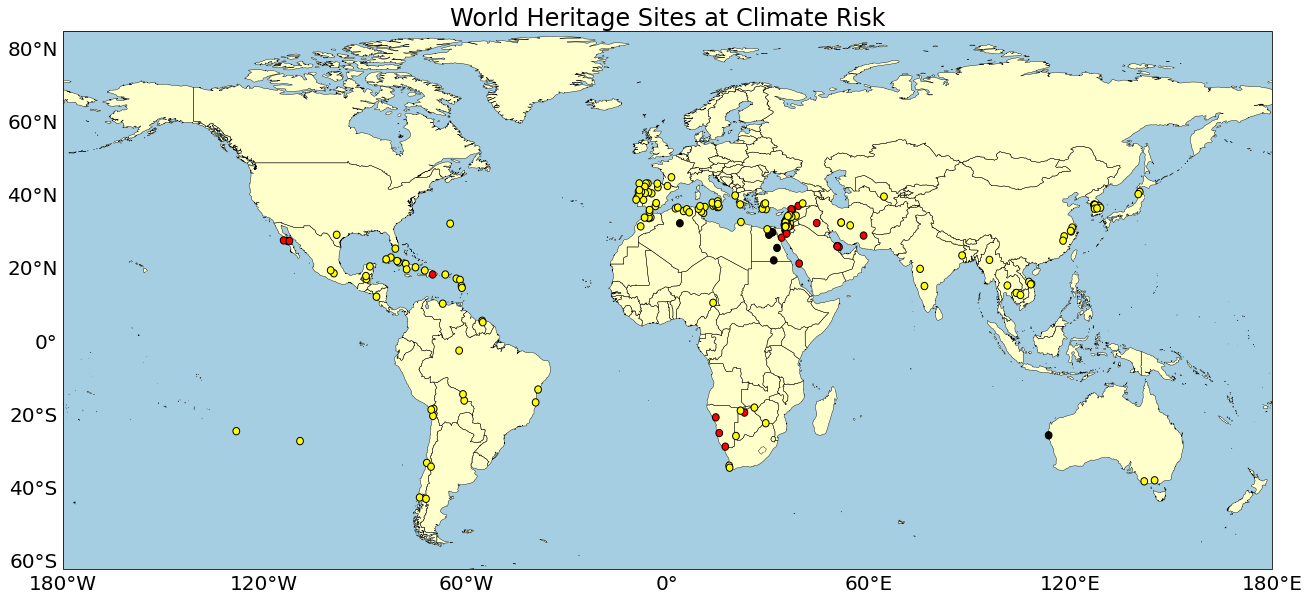

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (Days above 35°C, 2040-2059, SSP2-4.5)
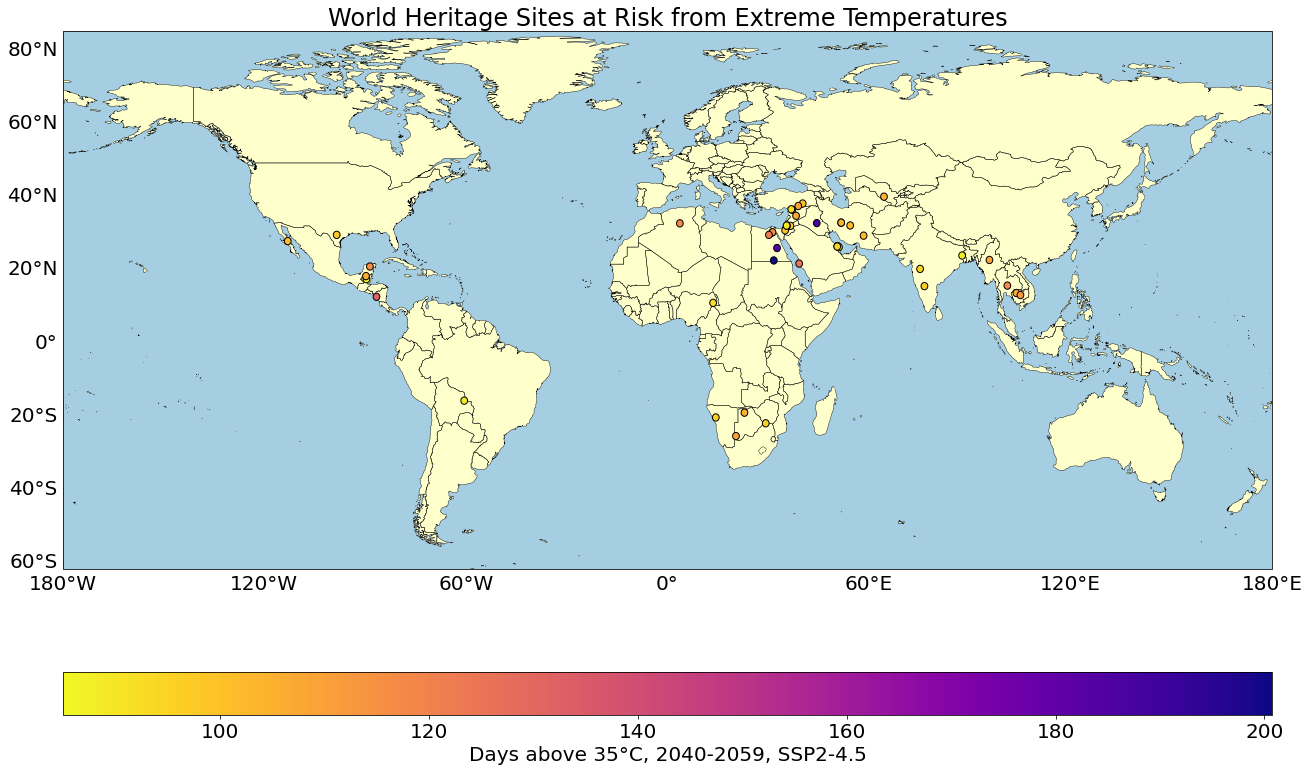

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (1 day maximum rainfall as % of annual, 2040-2059, SSP2-4.5)
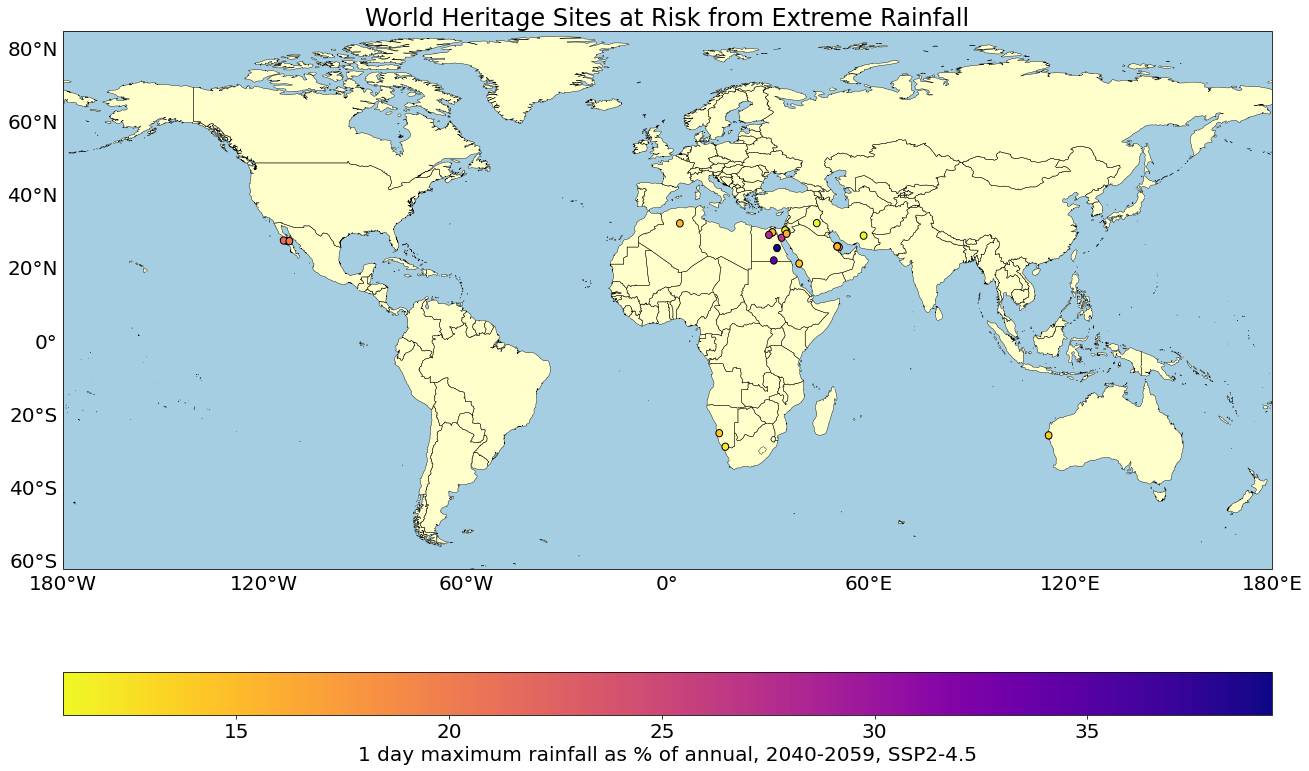

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (100-year hurricane wind, 2040-2059, SSP2-4.5)
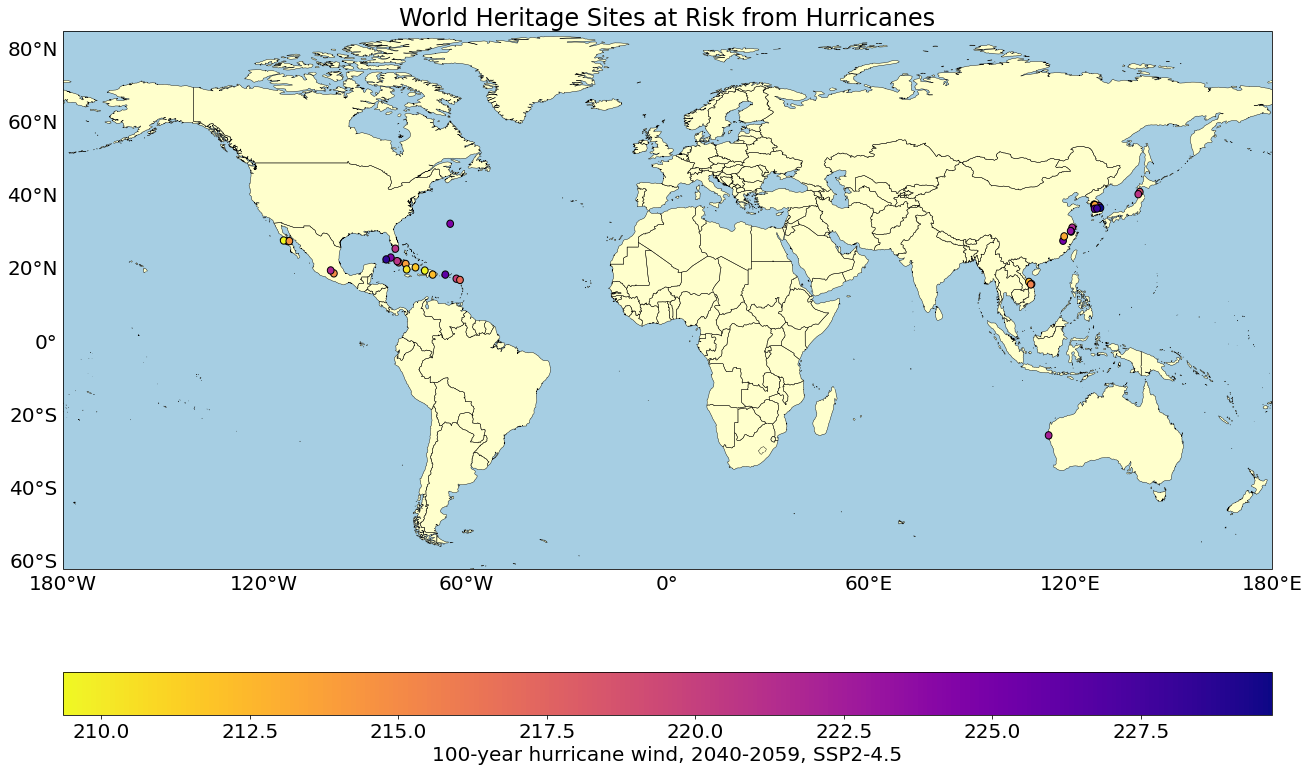

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Path.I      :Path   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]   (danger)
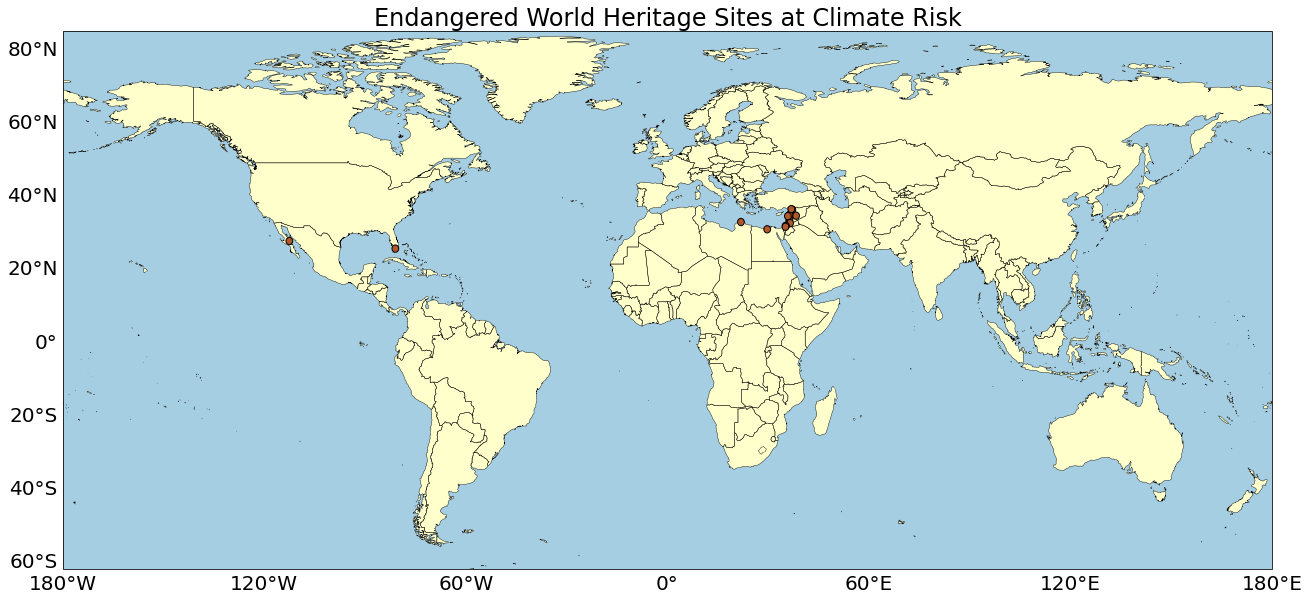

In [65]:
clim = pd.concat([cultural, natural, mixed])
count_1 = clim[clim["Count"] == 1]
map_1 = gv.Polygons( count_1, vdims = "Count",
    label = "Site exposed to 1 kind of climate risk"
    ).options(cmap = "autumn_r")
count_2 = clim[clim["Count"] == 2]
map_2 = gv.Polygons( count_2, vdims = "Count",
    label = "Site exposed to 2 kinds of climate risk"
    ).options(cmap = "autumn")
count_3 = clim[clim["Count"] == 3]
map_3 = gv.Polygons( count_3, vdims = "Count",
    label = "Site exposed to 3 kinds of climate risk"
    ).options(cmap = "hot")
map = ( ocean * countries * map_3 * map_2 * map_1 ).opts( show_legend = True,
    title = "World Heritage Sites at Climate Risk", **options_m )
gv.output( map, size = 600 )

i = 1
clim = pd.concat( [ cultural[cultural[cat_col_f[i][1]]],
    mixed[mixed[cat_col_f[i][1]]], natural[natural[cat_col_f[i][1]]] ] )
map_clim = gv.Polygons( clim, vdims = cat_col_f[i][0]
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * countries * map_clim ).opts(
    title = "World Heritage Sites at Risk from Extreme Temperatures",
    **options_m )
gv.output( map, size = 600 )

i = 2
clim = pd.concat( [ cultural[cultural[cat_col_f[i][1]]],
    mixed[mixed[cat_col_f[i][1]]], natural[natural[cat_col_f[i][1]]] ] )
map_clim = gv.Polygons( clim, vdims = cat_col_f[i][0]
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * countries * map_clim ).opts(
    title = "World Heritage Sites at Risk from Extreme Rainfall",
    **options_m )
gv.output( map, size = 600 )

i = 3
clim = pd.concat( [ cultural[cultural[cat_col_f[i][1]]],
    mixed[mixed[cat_col_f[i][1]]], natural[natural[cat_col_f[i][1]]] ] )
map_clim = gv.Polygons( clim, vdims = cat_col_f[i][0]
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * countries * map_clim ).opts(
    title = "World Heritage Sites at Risk from Hurricanes",
    **options_m )
gv.output( map, size = 600 )

danger = pd.concat( [ cultural[cultural["danger"]==1],
    mixed[mixed["danger"]==1], natural[natural["danger"]==1] ] )
map_danger = gv.Polygons( danger, vdims = "danger"
    ).opts( color = "brown", cmap = "paired_r",
    ylim = (-62,85), xlim = (-180,180) )
map = ( ocean * countries * map_danger ).opts(
    title = "Endangered World Heritage Sites at Climate Risk",
    **options_m )
gv.output( map, size = 600 )